In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
numLandmarks = 3
numPositions = 4
startX = 0
startY = 0
rows, cols = 2 * (numPositions + numLandmarks), 2 * (numPositions + numLandmarks)
omega = np.zeros((rows, cols))
Xi = np.zeros((rows, 1))
Xi[0] = startX
Xi[1] = startY
omega[0, 0] = 1
omega[1, 1] = 1

In [3]:
omega

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
data = [[0, 0, [[0, 2,2]]],
        [1, 0, [[0, 1,2], [1, 3,2]]],
        [3, 0, [[1, 1,2], [2, 3, 2]]],
        [6, 1, [[2, 0, 1]]]
        ]


In [5]:
for i in range(0, len(data)):
    landmarkArray = data[i][-1]

    for j in range(0, len(landmarkArray)):
        print(landmarkArray)
        markID = landmarkArray[j][0]
        x = landmarkArray[j][1]
        y = landmarkArray[j][2]
        
        confidence = 1

        omega[2*i, 2*i] += confidence
        omega[2*i, 2*numPositions + 2*markID] += -confidence
        omega[2*numPositions + 2*markID, 2*i] += -confidence
        omega[2*numPositions + 2*markID, 2*numPositions + 2*markID] += confidence 

        Xi[2*i, 0] += -x *confidence
        Xi[2*numPositions + 2*markID, 0] += x *confidence
        
        omega[2*i + 1, 2*i + 1] += confidence
        omega[2*i + 1, 2*numPositions + 2*markID + 1] += -confidence
        omega[2*numPositions + 2*markID + 1, 2*i + 1] += -confidence
        omega[2*numPositions + 2*markID + 1, 2*numPositions + 2*markID + 1] += confidence
        Xi[2*i + 1, 0] += -y *confidence
        Xi[2*numPositions + 2*markID + 1, 0] += y *confidence  
    
    if i == 0: # skip adding to the matrix if we on first position
        continue

    dx = (data[i][0] - data[i-1][0])
    dy = (data[i][1] - data[i-1][1])

    confidenceMovement = 1
    index = (i-1)

    omega[2*index, 2*index] +=  confidenceMovement
    omega[2*index, 2*index + 2] += - confidenceMovement
    omega[2*index + 2, 2*index] += - confidenceMovement
    omega[2*index + 2, 2*index + 2] += confidenceMovement

    Xi[2*index, 0] += -dx  * confidenceMovement             
    Xi[2*index + 2, 0] += dx * confidenceMovement   


    omega[2*index + 1, 2*index + 1] += confidenceMovement
    omega[2*index + 1, 2*index + 3] += - confidenceMovement
    omega[2*index + 3, 2*index + 1] += - confidenceMovement
    omega[2*index + 3, 2*index + 3] += confidenceMovement 

    Xi[2*index + 1, 0] += -dy * confidenceMovement
    Xi[2*index + 3, 0] += dy * confidenceMovement



[[0, 2, 2]]
[[0, 1, 2], [1, 3, 2]]
[[0, 1, 2], [1, 3, 2]]
[[1, 1, 2], [2, 3, 2]]
[[1, 1, 2], [2, 3, 2]]
[[2, 0, 1]]


In [6]:
omega

array([[ 3.,  0., -1.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  3.,  0., -1.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
         0.],
       [-1.,  0.,  4.,  0., -1.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,
         0.],
       [ 0., -1.,  0.,  4.,  0., -1.,  0.,  0.,  0., -1.,  0., -1.,  0.,
         0.],
       [ 0.,  0., -1.,  0.,  4.,  0., -1.,  0.,  0.,  0., -1.,  0., -1.,
         0.],
       [ 0.,  0.,  0., -1.,  0.,  4.,  0., -1.,  0.,  0.,  0., -1.,  0.,
        -1.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  2.,  0.,  0.,  0.,  0.,  0., -1.,
         0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
        -1.],
       [-1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.],
       [ 0., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.],
       [ 0.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.],
       [ 0.,  0.,  0., -1.,  0., -1.,  0., 

[5.329070518200751e-15, 1.0000000000000027, 3.0000000000000053, 6.000000000000005, 2.0000000000000036, 4.000000000000005, 6.0000000000000036]
[1.7763568394002505e-15, 4.440892098500626e-15, 5.329070518200751e-15, 1.0000000000000018, 2.0, 2.0000000000000018, 2.0]


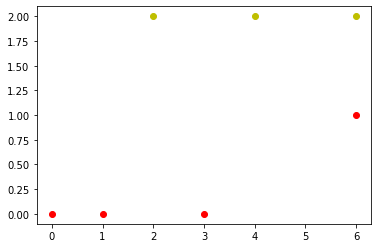

In [7]:
mu = np.linalg.inv(np.matrix(omega)) * Xi
np.set_printoptions(suppress=True)
mu = mu.tolist()
Xarray = []
Yarray = []
for i in range(0, len(mu)):
    item = mu[i][0]
    if i % 2 == 0:
        Xarray.append(item)
    else:
        Yarray.append(item)

plt.plot(Xarray[:4], Yarray[:4], 'ro')
plt.plot(Xarray[4:], Yarray[4:], 'yo')
print(Xarray)
print(Yarray)